In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('../input/earthquakes55/_LSTM_data2.csv')

In [3]:
x = np.array(df['Interevent_Count'])
y = np.array(df['MAG'])

In [4]:
n = 12 #Length of input series
data = []
mag = []

In [5]:
for i in range(len(x)-n+1):
    data.append(x[i:i+n])
    mag.append(y[i+n-1])

In [6]:
data = np.array(data).reshape((-1, n, 1))
mag = np.array(mag)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val_test, y_train, y_val_test = train_test_split(data, mag, test_size=0.3, random_state=89)
x_test, x_val, y_test, y_val = train_test_split(x_val_test, y_val_test, test_size=0.6, random_state=89)

In [8]:
model = tf.keras.Sequential([
            tf.keras.layers.InputLayer(input_shape=(n,1)),
            tf.keras.layers.LSTM(16, return_sequences=True),
            tf.keras.layers.LSTM(8),
            tf.keras.layers.Dense(1)
            ])

model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['MeanAbsolutePercentageError'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 16)            1152      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________


In [10]:
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_mean_absolute_percentage_error', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=25)

In [11]:
history = model.fit(x_train, y_train, batch_size=1024,
                    validation_data=(x_val, y_val), 
                    epochs=500, callbacks=[checkpoint, early])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 33.0833 - mean_absolute_percentage_error: 99.8728
Epoch 00001: val_mean_absolute_percentage_error improved from inf to 99.36734, saving model to cxr_reg_weights.best.hdf5
1/1 [==============================] - 1s 1s/step - loss: 33.0833 - mean_absolute_percentage_error: 99.8728 - val_loss: 33.1151 - val_mean_absolute_percentage_error: 99.3673
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 32.7034 - mean_absolute_percentage_error: 99.2953
Epoch 00002: val_mean_absolute_percentage_error improved from 99.36734 to 98.79586, saving model to cxr_reg_weights.best.hdf5
1/1 [==============================] - 0s 36ms/step - loss: 32.7034 - mean_absolute_percentage_error: 99.2953 - val_loss: 32.7369 - val_mean_absolute_percentage_error: 98.7959
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 32.3277 - mean_absolute_percentage_error: 98.7209
Epoch 00003: val_mean_absolute_percentage_error impr

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

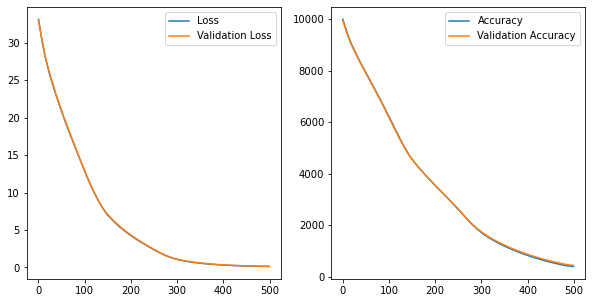

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(history.history['loss'], '-', label = 'Loss')
ax1.plot(history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(history.history['mean_absolute_percentage_error']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(history.history['val_mean_absolute_percentage_error']), '-',
         label = 'Validation Accuracy')
ax2.legend()

In [14]:
model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 2ms/step - loss: 0.1208 - mean_absolute_percentage_error: 4.0206


[0.12081615626811981, 4.020626068115234]

In [15]:
model.predict(x_test)

array([[5.529222 ],
       [5.529411 ],
       [5.530472 ],
       [5.527777 ],
       [5.520931 ],
       [5.530097 ],
       [5.5222363],
       [5.5308323],
       [5.522342 ],
       [5.528777 ],
       [5.530481 ],
       [5.529861 ],
       [5.5265956],
       [5.528807 ],
       [5.5224886],
       [5.5268345],
       [5.529496 ],
       [5.526284 ],
       [5.523377 ],
       [5.5287356],
       [5.5269647],
       [5.523809 ],
       [5.5299664],
       [5.5221066],
       [5.5264344],
       [5.525887 ],
       [5.53005  ],
       [5.5297484],
       [5.5295672],
       [5.527722 ],
       [5.5300956],
       [5.530652 ],
       [5.5299673],
       [5.5287395],
       [5.5256495],
       [5.5258474],
       [5.529411 ],
       [5.529271 ],
       [5.5202684],
       [5.524059 ],
       [5.524345 ],
       [5.5267334],
       [5.5233483],
       [5.5275683],
       [5.527838 ],
       [5.529798 ],
       [5.529843 ],
       [5.526095 ],
       [5.5264406],
       [5.5217204],
